In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym.envs.registration import register
import time
import os
# from .main import egas, computeQValue, decay, punish, newDecay
import main


In [2]:
env = gym.make('CartPole-v1')
# env = gym.make('CartPole-v1', render_mode="human")
# env.reset()
# env.close()render_mode="human"

In [3]:
# env.reset()
# for _ in range(100):
#     env.render()
#     # observation, reward, done, info, check = env.step(env.action_space.sample())
#     time.sleep(0.03)
#     if done:
#         env.reset()
# env.close()

In [4]:
EPOCHS = 5000
ALPHA = 0.8
GAMMA = 0.9
NO_OF_BINS = 10

epsilon = 1.0
min_epsilon = 0.01
max_epsilon = 1.0
decay_val = 0.0045

In [5]:
def createBins(noOfBins):
    binCartPosition = np.linspace(-4.8, 4.8, noOfBins)
    binCartVelocity = np.linspace(-5, 5, noOfBins)
    binPoleAngle = np.linspace(-0.418, 0.418, noOfBins)
    binAngularVelocity = np.linspace(-5, 5, noOfBins)

    return np.array([binCartPosition, binCartVelocity, binPoleAngle, binAngularVelocity])

In [6]:
bins = createBins(NO_OF_BINS)

In [7]:
def discretizeObs(observation, bins):
    binned_obs = []
    for i, obs in enumerate(observation):
        discreetVal = np.digitize(obs, bins[i])
        binned_obs.append(discreetVal)

    return tuple(binned_obs)

In [8]:
def egas(epsilon, qTable, discrete_state):
    rn = np.random.random()
    # exploitation
    if rn > epsilon:
        # print(discrete_state)
        # print('Exploit')
        action = np.argmax(qTable[discrete_state])
        # print(action)
    else:
        # print('random')
        action = env.action_space.sample()

    return action

In [9]:
# observation

In [10]:
# discretizeObs(observation, bins)

In [9]:
qTableShape = (NO_OF_BINS, NO_OF_BINS, NO_OF_BINS, NO_OF_BINS, env.action_space.n)
# tTableShape = (NO_OF_BINS, NO_OF_BINS, NO_OF_BINS, NO_OF_BINS, env.action_space.n)

In [10]:
qTable = np.zeros(qTableShape)
tTable = np.zeros(qTableShape)

In [11]:
qTable.shape

(10, 10, 10, 10, 2)

In [12]:
qTable[(5,5,5,5)]

array([0., 0.])

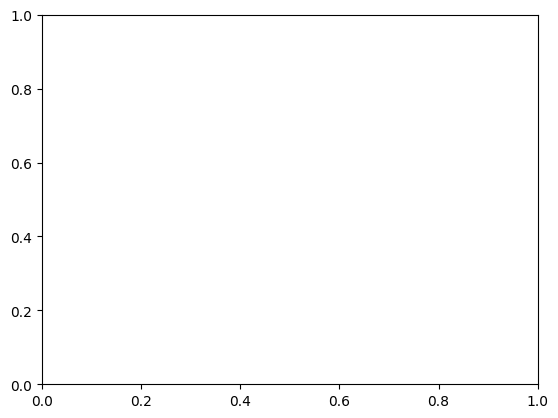

In [13]:
#Visualization
log_interval = 500
render_interval = 30000
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()

points_log = []
avg_mean_points = []
epochs = []

In [16]:
# q = qTable[(5,5,5,5)]

In [17]:
# q

C:\Users\bherw\OneDrive\Desktop\Suraj\Reinforment Learning\gridworld\venv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


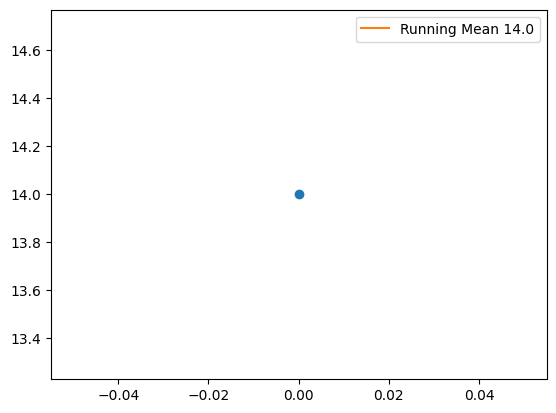

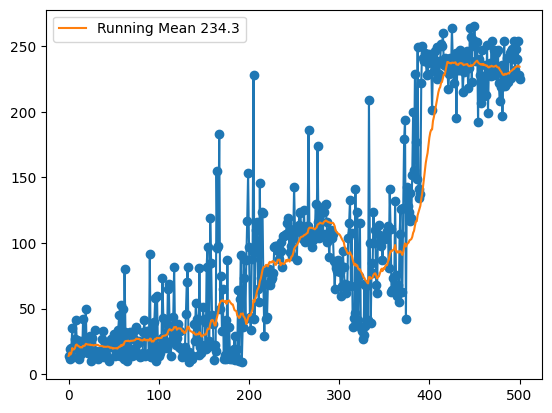

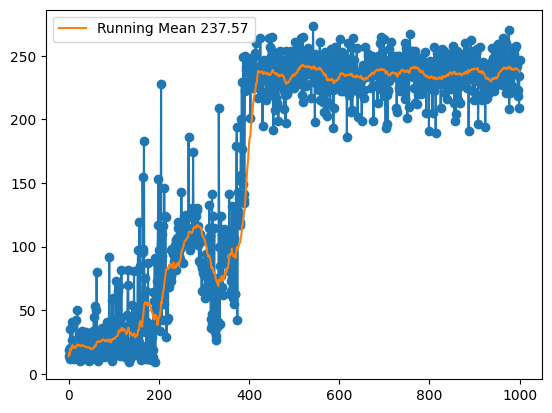

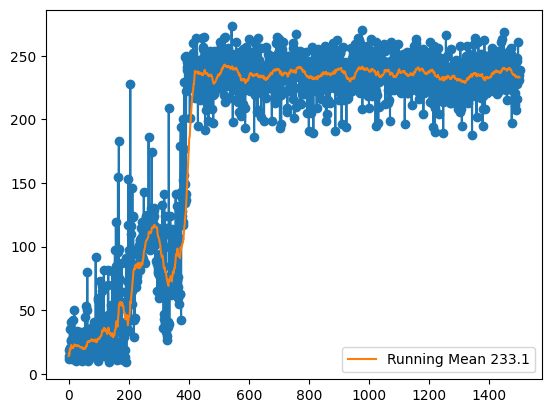

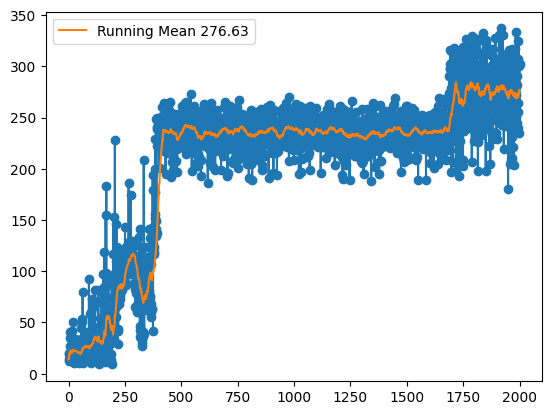

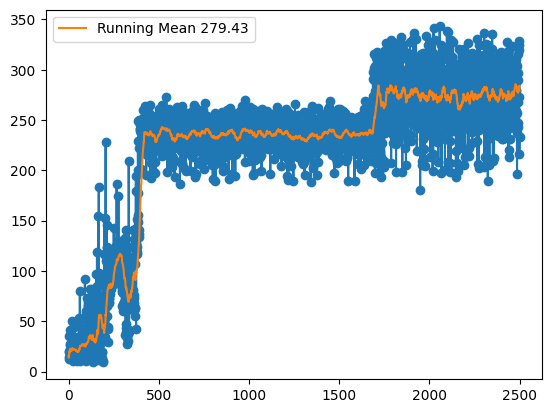

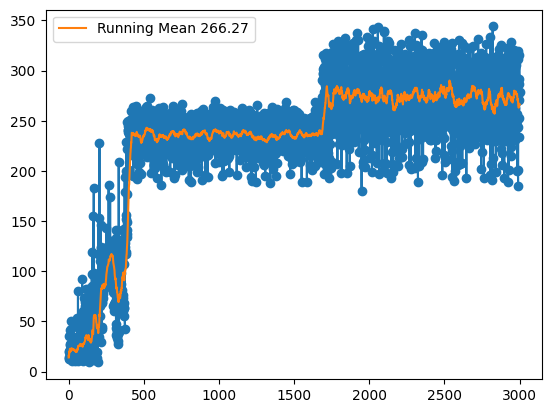

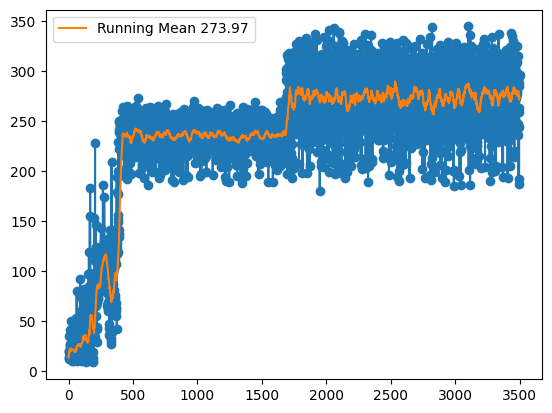

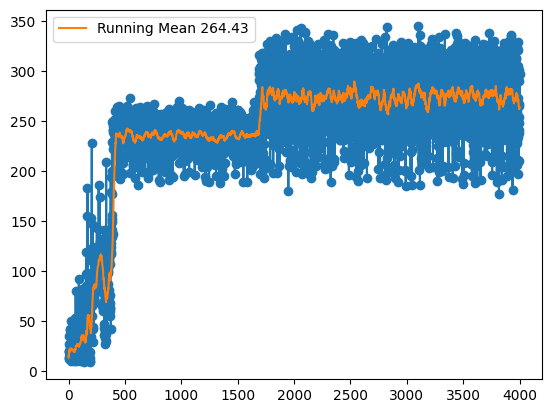

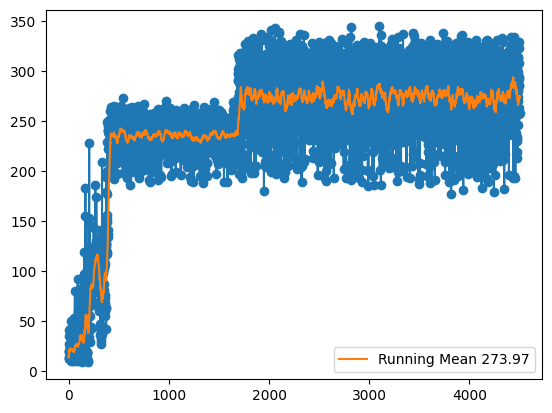

In [14]:
for epoch in range(EPOCHS):
    initState = env.reset()
    # print(initState)
    discreetState = discretizeObs(initState[0], bins)
    done = False
    points = 0
    epochs.append(epoch)

    while not done:
        action = egas(epsilon, qTable, discreetState)
        # print(action)
        nextState, reward, done, info, check = env.step(action)
        # print(nextState, reward, done, info, check)
        reward = main.punish(done, reward, points)
        # print(reward)
        nextDiscreetState = discretizeObs(nextState, bins)
        # print(nextDiscreetState)
        oldQVal = qTable[(discreetState)+(action,)]
        # print(oldQVal)
        nextOptimalQValue = np.max(qTable[nextDiscreetState])
        # print(nextOptimalQValue)
        nextQ = main.computeQValue(oldQVal, reward, nextOptimalQValue)
        # print(nextQ)
        qTable[discreetState+(action,)] = nextQ
        # print(qTable[discreetState+(action,)])
        discreetState = nextDiscreetState
        # print(discreetState)
        points+=1
        # print("-----------------------------------------------------------------------")



    epsilon = main.newDecay(epsilon, decay_val, epoch)
    points_log.append(points)
    running_mean = round(np.mean(points_log[-30:]), 2)
    avg_mean_points.append(running_mean)

    if epoch % log_interval == 0:
        plt.figure().clear()

        plt.scatter(epochs, points_log)
        plt.plot(epochs, points_log)
        plt.plot(epochs, avg_mean_points, label = f"Running Mean {running_mean}")
        plt.legend()
        fig.canvas.draw()
        plt.show()



env.close()

In [19]:
qTable[nextDiscreetState]

array([  3.49828608, -96.60783119])

In [15]:
env.close()

In [16]:
env = gym.make('CartPole-v1', render_mode="human")
obs = env.reset()[0]
rewards = 0

for step in range(10000):
    env.render()
    discreetState = discretizeObs(obs, bins)
    action = np.argmax(qTable[discreetState])
    obs, reward, done, info, check = env.step(action)
    rewards+=1

    if done:
        print(f"Reward: {rewards}")
        break

env.close()

Reward: 194
